In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('iris_ndarray.pickle','rb') as f:
    iris_np = pickle.load(f)
#print(iris_np) 
# sepal ratio :  sepal length[0] / sepal width[1]
# petal ratio :  petal length[2] / petal width[3]
sepal_length = iris_np[:,0]
sepal_width = iris_np[:,1]
petal_length = iris_np[:,2]
petal_width = iris_np[:,3]
sepal_ratio = sepal_length / sepal_width
petal_ratio = petal_length / petal_width
#print(sepal_ratio)
#print(petal_ratio)
#print(sepal_ratio.shape)
sepal_ratio_2d = np.expand_dims(sepal_ratio,1) 
#print(sepal_ratio_2d.shape)

#print(petal_ratio.shape)
petal_ratio_2d = petal_ratio[:,np.newaxis]
#print(petal_ratio_2d.shape)

concat_result = np.concatenate((sepal_ratio_2d, petal_ratio_2d), axis = 1)
print(concat_result,concat_result.shape)

[[ 1.45714286  7.        ]
 [ 1.63333333  7.        ]
 [ 1.46875     6.5       ]
 [ 1.48387097  7.5       ]
 [ 1.38888889  7.        ]
 [ 1.38461538  4.25      ]
 [ 1.35294118  4.66666667]
 [ 1.47058824  7.5       ]
 [ 1.51724138  7.        ]
 [ 1.58064516 15.        ]
 [ 1.45945946  7.5       ]
 [ 1.41176471  8.        ]
 [ 1.6        14.        ]
 [ 1.43333333 11.        ]
 [ 1.45        6.        ]
 [ 1.29545455  3.75      ]
 [ 1.38461538  3.25      ]
 [ 1.45714286  4.66666667]
 [ 1.5         5.66666667]
 [ 1.34210526  5.        ]
 [ 1.58823529  8.5       ]
 [ 1.37837838  3.75      ]
 [ 1.27777778  5.        ]
 [ 1.54545455  3.4       ]
 [ 1.41176471  9.5       ]
 [ 1.66666667  8.        ]
 [ 1.47058824  4.        ]
 [ 1.48571429  7.5       ]
 [ 1.52941176  7.        ]
 [ 1.46875     8.        ]
 [ 1.5483871   8.        ]
 [ 1.58823529  3.75      ]
 [ 1.26829268 15.        ]
 [ 1.30952381  7.        ]
 [ 1.58064516 15.        ]
 [ 1.5625      6.        ]
 [ 1.57142857  6.5       ]
 

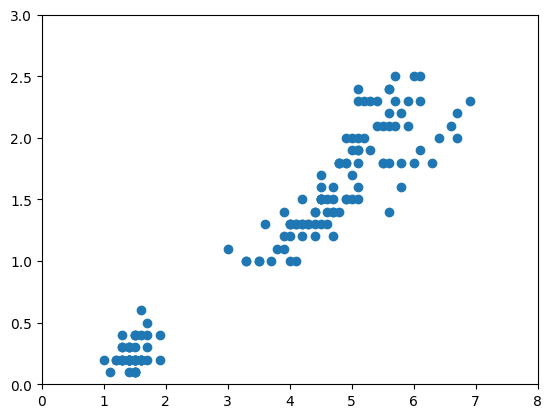

In [3]:
_,axe = plt.subplots()
axe.set_xlim(0,8)
axe.set_ylim(0,3.0)
axe.scatter(iris_np[:,2],iris_np[:,3]) # class 0만 플롯, bool list를 이용 필터링

In [4]:
print(iris_np[:5])

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]


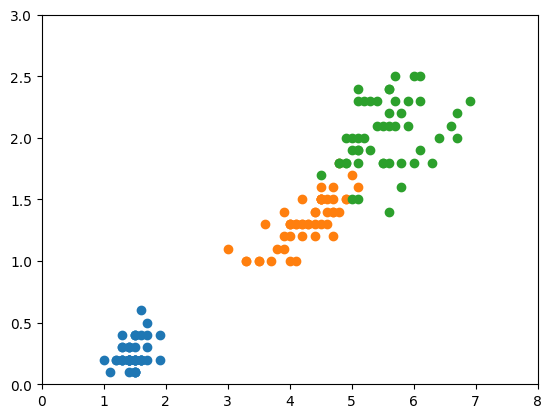

In [5]:
filter_class0 = iris_np[:,-1] == 0.0
iris_np_class0 = iris_np[filter_class0]

filter_class1 = iris_np[:,-1] == 1.0
iris_np_class1 = iris_np[filter_class1]

filter_class2 = iris_np[:,-1] == 2.0
iris_np_class2 = iris_np[filter_class2]


_, axe = plt.subplots()
axe.set_xlim(0, 8)
axe.set_ylim(0, 3.0)

axe.scatter(iris_np_class0[:, 2], iris_np_class0[:, 3])
axe.scatter(iris_np_class1[:, 2], iris_np_class1[:, 3])
axe.scatter(iris_np_class2[:, 2], iris_np_class2[:, 3])

In [14]:
def kNN_predict(iris_np_data, petal_length, petal_width):  # k = 5
# (150,2) (2,)
    sub_data = iris_np_data[:,2:4]
    target_np = np.array([petal_length, petal_width])
    #print(sub_data.shape)
    #print(target_np.shape)
    #print((target_np -sub_data)**2)
    #print(np.sum(((target_np -sub_data)**2),axis =1 )  )
    dist = np.sqrt(np.sum(((target_np -sub_data)**2),axis =1 ))
    print(dist[:3], len(dist)) 
    class_np = iris_np_data[:,-1]
    print(class_np[:3],len(class_np))
    
    dist_1 = np.expand_dims(dist,1)
    class_np_1 = np.expand_dims(class_np,1)
    print(dist_1.shape)
    print(class_np_1.shape)
    r = np.concatenate((dist_1,class_np_1),axis = 1)
    print(r.shape)
    r = sorted(r,key=lambda x:x[1], reverse = True)
    print(r[:10])
    

kNN_predict(iris_np,5.0,1.5) # 거리가 가장 가까운 5개 샘플 반환

[3.82753184 3.82753184 3.92173431] 150
[0. 0. 0.] 150
(150, 1)
(150, 1)
(150, 2)
[array([1.41421356, 2.        ]), array([0.41231056, 2.        ]), array([1.08166538, 2.        ]), array([0.67082039, 2.        ]), array([1.06301458, 2.        ]), array([1.70880075, 2.        ]), array([0.53851648, 2.        ]), array([1.33416641, 2.        ]), array([0.85440037, 2.        ]), array([1.48660687, 2.        ])]
